DATA SOURCE : https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

# Title - Mapping Global Shipping Efficiency: A Supply Chain Data Story
Problem def : To perform descriptive and diagnostic analytics on the given data to identify patterns and performance insights on metrics such as delivery issues, shipping delays,operational efficiency, department wise product sales, geospatial sales insights etc.

# Details
* The dataset has around 1,80,519 records/rows and 53 columns. It appears to be a denormalized tabular dataset with multiple duplicate columns. Few columns have redacted values and null values.
* It has both categorical(24) and numerical(29) columns.
* column names are as - 'Type', 'Days for shipping (real)', 'Days for shipment (scheduled)','Benefit per order', 'Sales per customer', 'Delivery Status','Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City','Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id','Customer Lname', 'Customer Password', 'Customer Segment','Customer State', 'Customer Street', 'Customer Zipcode','Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market','Order City', 'Order Country', 'Order Customer Id','order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id','Order Item Discount', 'Order Item Discount Rate', 'Order Item Id','Order Item Product Price', 'Order Item Profit Ratio','Order Item Quantity', 'Sales', 'Order Item Total','Order Profit Per Order', 'Order Region', 'Order State', 'Order Status','Order Zipcode', 'Product Card Id', 'Product Category Id','Product Description', 'Product Image', 'Product Name', 'Product Price','Product Status', 'shipping date (DateOrders)', 'Shipping Mode'

In [1]:
import pandas as pd
supplychaindata=pd.read_csv(r"C:\Users\45229\Desktop\entri\data\DataCoSupplyChainDataset.csv\DataCoSupplyChainDataset.csv",encoding="latin1")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
supplychaindatacleaned=pd.read_csv(r"C:\Users\45229\Desktop\supplychaindatacleaned.csv")

In [4]:
for i in supplychaindata['Shipping Mode'].unique():
    days=supplychaindata.loc[supplychaindata['Shipping Mode']==i,'Days for shipment (scheduled)']
    print(i,':',(days.unique()))      

avg_days=supplychaindata.groupby('Shipping Mode')[[ 'Days for shipping (real)','Days for shipment (scheduled)']].mean()
avg_days

Standard Class : [4]
First Class : [1]
Second Class : [2]
Same Day : [0]


Days for shipping (real)  Days for shipment (scheduled)
Shipping Mode                                                          
First Class                     2.000000                            1.0
Same Day                        0.478279                            0.0
Second Class                    3.990828                            2.0
Standard Class                  3.995907                            4.0

In [5]:
pd.set_option('display.max_columns',None)
print(supplychaindata.head(5))

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        

In [6]:
pd.reset_option('display.max_columns')

In [7]:
supplychaindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [8]:
print(supplychaindata.describe(include=[int,float]))

       Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000 

In [9]:
supplychaindata.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [10]:
print(supplychaindata['Benefit per order'].corr(supplychaindata['Order Profit Per Order']))
print(supplychaindata['Category Id'].equals(supplychaindata['Product Category Id']))
print(supplychaindata['Sales per customer'].corr(supplychaindata['Order Item Total']))
print(supplychaindata['Order Item Cardprod Id'].equals(supplychaindata['Product Card Id']))
print(supplychaindata['Order Item Product Price'].equals(supplychaindata['Product Price']))
print(supplychaindata['Customer Id'].equals(supplychaindata['Order Customer Id']))

1.0
True
1.0
True
True
True


In [11]:
# DROPPED COLUMNS
supplychaindata.drop(columns=['Order Profit Per Order','Category Id','Order Item Total','Order Item Cardprod Id','Product Price'],inplace=True)
supplychaindata.drop(columns=['Order Zipcode','Product Description','Product Image','Customer Email',
                              'Customer Password','Product Status','Order Customer Id'],inplace=True)

In [12]:
# NULLS REPLACEMENT
supplychaindata['Customer Lname'].isnull().sum()
supplychaindata['Customer Lname']=supplychaindata['Customer Lname'].fillna('Unknown')

supplychaindata['Customer Zipcode'].isnull().sum()
supplychaindata['Customer Zipcode'].mode()
supplychaindata['Customer Zipcode']=supplychaindata['Customer Zipcode'].fillna(value=725.0)

In [13]:
# DATATYPE CONVERSION
supplychaindata['Customer Zipcode']=supplychaindata['Customer Zipcode'].astype(int)
supplychaindata['order date (DateOrders)']=pd.to_datetime(supplychaindata['order date (DateOrders)'])
supplychaindata['shipping date (DateOrders)']=pd.to_datetime(supplychaindata['shipping date (DateOrders)'])

In [14]:
supplychaindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Name                  180519 non-null  object        
 8   Customer City                  180519 non-null  object        
 9   Customer Country               180519 non-null  object        
 10  Customer Fname                 180519 non-null  object        
 11  

In [15]:
# Customer states are from the U.S and Puerto Rico
print(supplychaindata['Customer State'].unique())
print(len(supplychaindata['Customer Id'].unique()))
supplychaindata['Customer State']=supplychaindata['Customer State'].replace({'95758': 'CA', '91732':'CA'})

['PR' 'CA' 'NY' 'FL' 'MA' 'IL' 'MT' 'PA' 'MI' 'TX' 'DE' 'GA' 'MD' 'OH'
 'HI' 'NJ' 'WI' 'AZ' 'CO' 'MN' 'NC' 'NM' 'OR' 'SC' 'VA' 'UT' 'WA' 'KY'
 'WV' 'RI' 'CT' 'LA' 'TN' 'DC' 'ND' 'MO' 'IN' 'ID' 'NV' 'KS' 'AR' 'OK'
 'AL' 'IA' '95758' '91732']
20652


# Data preprocessing completed.
# First, dropped columns
'Product status' and 'product decription' both which had null values only, followed by 'order zipcode' which had too many null values that can't be reasonably replaced. Then the 'product image link' column was removed as it is insignificant for the analysis. Thirdly, redacted columns of 'customer mail' and 'customer password' was also dropped. (Total=6)
# Next duplicate columns were identified. 
5 sets of columns (totally 12 col) were checked for correlation and found to be identical hence dropped 5 columns named 'Order Profit Per Order','Category Id','Order Item Total','Order Item Cardprod Id','Product price','Order Customer Id' while 6 were retained for the same data('Benefit per order','Product Category Id','Sales per customer','Product Card Id','Order Item Product Price','Customer Id' )(Total=6)
# Null values replaced. 
'Customer Lname','Customer Zipcode' had 8 and 3 null values respectively. While Customer Lname was replaced with 'unknown', Customer zipcode was replaced with the mode value(725.0).
# Changed datatypes
'order date' and 'shipping date' columns from object to datetime format, also 'customer zipcode' from float to int.

In [16]:
print(supplychaindata['Type'].unique())
print(supplychaindata['Order Status'].unique())
category_map=supplychaindata[['Product Category Id','Category Name']].drop_duplicates()
category_dict=dict(zip(category_map['Product Category Id'],category_map['Category Name']))
print(category_dict)
Dept_map=supplychaindata[['Department Id','Department Name']].drop_duplicates()
Dept_dict=dict(zip(Dept_map['Department Id'],Dept_map['Department Name']))
print(Dept_dict)
print(supplychaindata['Customer Country'].unique())
print(len(supplychaindata['Order Country'].unique()))
print(supplychaindata.head(1).T)

['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']
['COMPLETE' 'PENDING' 'CLOSED' 'PENDING_PAYMENT' 'CANCELED' 'PROCESSING'
 'SUSPECTED_FRAUD' 'ON_HOLD' 'PAYMENT_REVIEW']
{73: 'Sporting Goods', 17: 'Cleats', 29: 'Shop By Sport', 24: "Women's Apparel", 13: 'Electronics', 12: 'Boxing & MMA', 9: 'Cardio Equipment', 41: 'Trade-In', 37: 'Electronics', 38: "Kids' Golf Clubs", 44: 'Hunting & Shooting', 3: 'Baseball & Softball', 18: "Men's Footwear", 43: 'Camping & Hiking', 65: 'Consumer Electronics', 62: 'Cameras ', 64: 'Computers', 4: 'Basketball', 2: 'Soccer', 26: "Girls' Apparel", 40: 'Accessories', 76: "Women's Clothing", 66: 'Crafts', 70: "Men's Clothing", 6: 'Tennis & Racquet', 11: 'Fitness Accessories', 16: 'As Seen on  TV!', 36: 'Golf Balls', 10: 'Strength Training', 63: "Children's Clothing", 5: 'Lacrosse', 60: 'Baby ', 45: 'Fishing', 59: 'Books ', 67: 'DVDs', 61: 'CDs ', 68: 'Garden', 7: 'Hockey', 72: 'Pet Supplies', 69: 'Health and Beauty', 71: 'Music', 75: 'Video Games', 35: 'Golf Gloves', 34:

In [53]:
# DERIVED COLUMNS :
supplychaindata['shippingdelay']=(supplychaindata['Days for shipping (real)']-supplychaindata['Days for shipment (scheduled)'])
supplychaindata['grossprofit']=supplychaindata['Sales']*supplychaindata['Order Item Profit Ratio']
supplychaindata['order month']=supplychaindata['order date (DateOrders)'].dt.to_period('M')
supplychaindata['shipping month']=supplychaindata['shipping date (DateOrders)'].dt.to_period('M')
supplychaindata['Year']=supplychaindata['order date (DateOrders)'].dt.year

# Started EDA by deriving columns for grossprofit, shipping delay(days), order month and shipping month for initial analysis.

In [54]:
supplychaindatacleaned=supplychaindata.copy()
supplychaindatacleaned.to_csv('supplychaindatacleaned.csv',index=False)

In [55]:
supplychaindatacleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Name                  180519 non-null  object        
 8   Customer City                  180519 non-null  object        
 9   Customer Country               180519 non-null  object        
 10  Customer Fname                 180519 non-null  object        
 11  

In [20]:
avg_ship_delay_byordercountry=supplychaindatacleaned.groupby('Order Country')['shippingdelay'].mean()

delayed_countries=avg_ship_delay_byordercountry[avg_ship_delay_byordercountry>0].reset_index()
delayed_countries=delayed_countries.sort_values(by='shippingdelay')
delayed_countries_1day=delayed_countries[(delayed_countries['shippingdelay']>0) & (delayed_countries['shippingdelay']<1)]
delayed_countries_DELAY=delayed_countries[delayed_countries['shippingdelay']>1.1]

ontime_del_countries=avg_ship_delay_byordercountry[avg_ship_delay_byordercountry<=0]
print(f'No. of order countries who recieved their deliveries early/on time: {ontime_del_countries.count()}')
print(f'No. of order countries who recieved their deliveries within 24hr delay: {len(delayed_countries_1day)}')
print(f'No. of order countries with delays over a day and more: {len(delayed_countries_DELAY)}')


No. of order countries who recieved their deliveries early/on time: 12
No. of order countries who recieved their deliveries within 24hr delay: 135
No. of order countries with delays over a day and more: 15


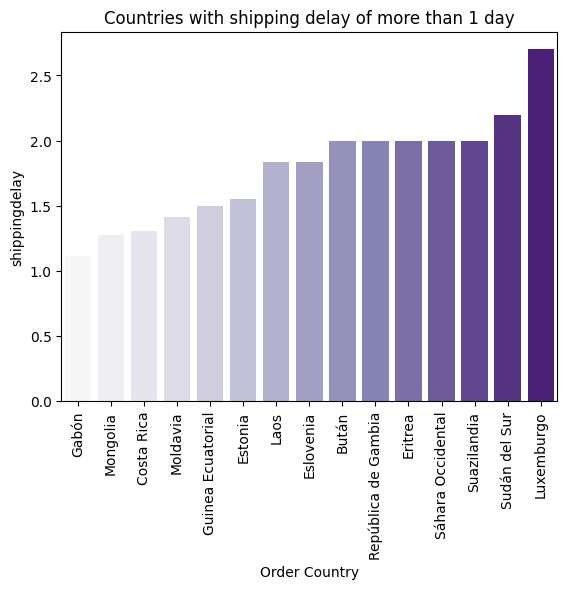

In [21]:
delayed_countries_DELAY.reset_index()
sns.barplot(x='Order Country',y='shippingdelay',data=delayed_countries_DELAY,palette='Purples',hue='Order Country',legend=False)
plt.title('Countries with shipping delay of more than 1 day')
plt.xticks(rotation=90)
plt.show()

# Shipping and delivery analysis 1 - geographic delay

Positive delays show countries with late deliveries. Here, deliveries that have been delayed more than 1 day have been shown which amounts to 15 order countries. While the remaining 147 countries receive shipments with delay less than 24hrs. Luxemborg is the most order delayed country followed by South Sudan.

                    shippingdelay  Late_delivery_risk
shippingdelay            1.000000            0.777644
Late_delivery_risk       0.777644            1.000000
                Days for shipping (real)  Days for shipment (scheduled)
Shipping Mode                                                          
First Class                     2.000000                            1.0
Same Day                        0.478279                            0.0
Second Class                    3.990828                            2.0
Standard Class                  3.995907                            4.0


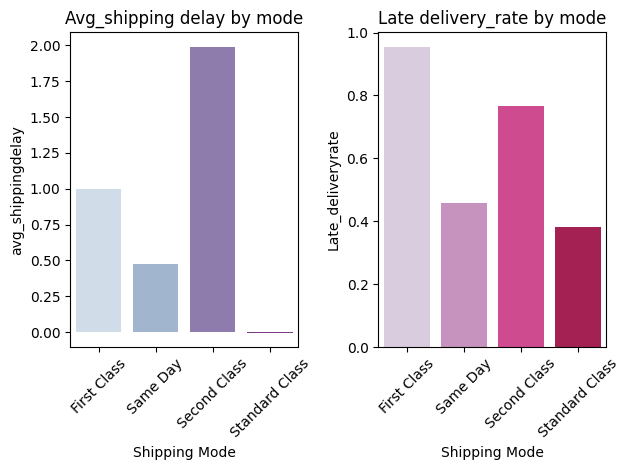

In [22]:
correlation=supplychaindatacleaned[['shippingdelay','Late_delivery_risk']].corr()
print(correlation)
shippinng_stats=supplychaindatacleaned.groupby('Shipping Mode').agg({'shippingdelay' : 'mean','Late_delivery_risk' : 'mean'})
shippinng_stats_df=shippinng_stats.reset_index()
shippinng_stats_df.columns=['Shipping Mode','avg_shippingdelay','Late_deliveryrate']  

avg_days=supplychaindatacleaned.groupby('Shipping Mode')[[ 'Days for shipping (real)','Days for shipment (scheduled)']].mean()
print(avg_days)

fig, axes= plt.subplots(1,2)
sns.barplot(x='Shipping Mode',y='avg_shippingdelay',data=shippinng_stats_df, ax=axes[0],hue='Shipping Mode',palette='BuPu')
axes[0].set_title('Avg_shipping delay by mode')
axes[0].tick_params(axis='x',rotation=45)
axes[0].set_xlabel('Shipping Mode')
sns.barplot(x='Shipping Mode',y='Late_deliveryrate',data=shippinng_stats_df,ax=axes[1],hue='Shipping Mode',palette='PuRd')
axes[1].set_title('Late delivery_rate by mode')
axes[1].tick_params(axis='x',rotation=45)
axes[1].set_xlabel('Shipping Mode')
plt.tight_layout()
plt.show()

# Shipping and delivery analysis 2

* Average Shipping Delay - Second Class had the highest delay (~2.0 days)
* Late Delivery Rate - First Class had the highest risk (~0.8)

Second Class really is the slowest performing mode relative to promise: Expected 2 days, actually ~4 days → +2 days late on average(double the wait)
First Class also underperforms slightly: Promised 1 day, takes 2 → +1 day delay, which explains the 95% late rate.
Same Day is fairly close: Only about half a day late on average — likely due to dispatch timing or cutoff hour issues.
Standard Class looks great: Promised 4 days, delivers in ~4 → basically on time or slightly early.

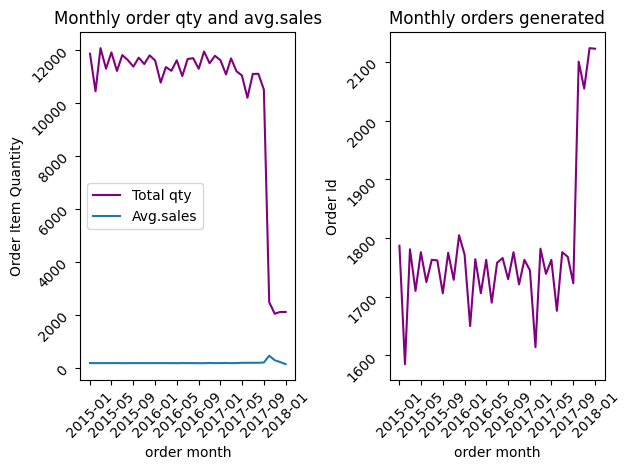

In [23]:
#shipping and sales in delayed countries
supplychaindatacleaned['order month']=supplychaindatacleaned['order month'].dt.to_timestamp()
supplychaindatacleaned['shipping month']=supplychaindatacleaned['shipping month'].dt.to_timestamp()
order_vol=supplychaindatacleaned.groupby('order month').agg({'Order Item Quantity':'sum','Sales':'mean'}).reset_index()
order_vol_on_ordernnumbers=supplychaindatacleaned.groupby('order month')['Order Id'].nunique().reset_index()

fig, axes =plt.subplots(1,2, sharex=True)
sns.lineplot(x='order month',y='Order Item Quantity',data=order_vol,label='Total qty',color='Purple',ax=axes[0])
sns.lineplot(x='order month',y='Sales',data=order_vol,label='Avg.sales',ax=axes[0])
axes[0].set_title('Monthly order qty and avg.sales')
axes[0].tick_params(rotation=45)
sns.lineplot(data=order_vol_on_ordernnumbers,x='order month',y='Order Id',color='Purple',ax=axes[1])
axes[1].set_title('Monthly orders generated')
axes[1].tick_params(rotation=45)
plt.tight_layout()
plt.show()

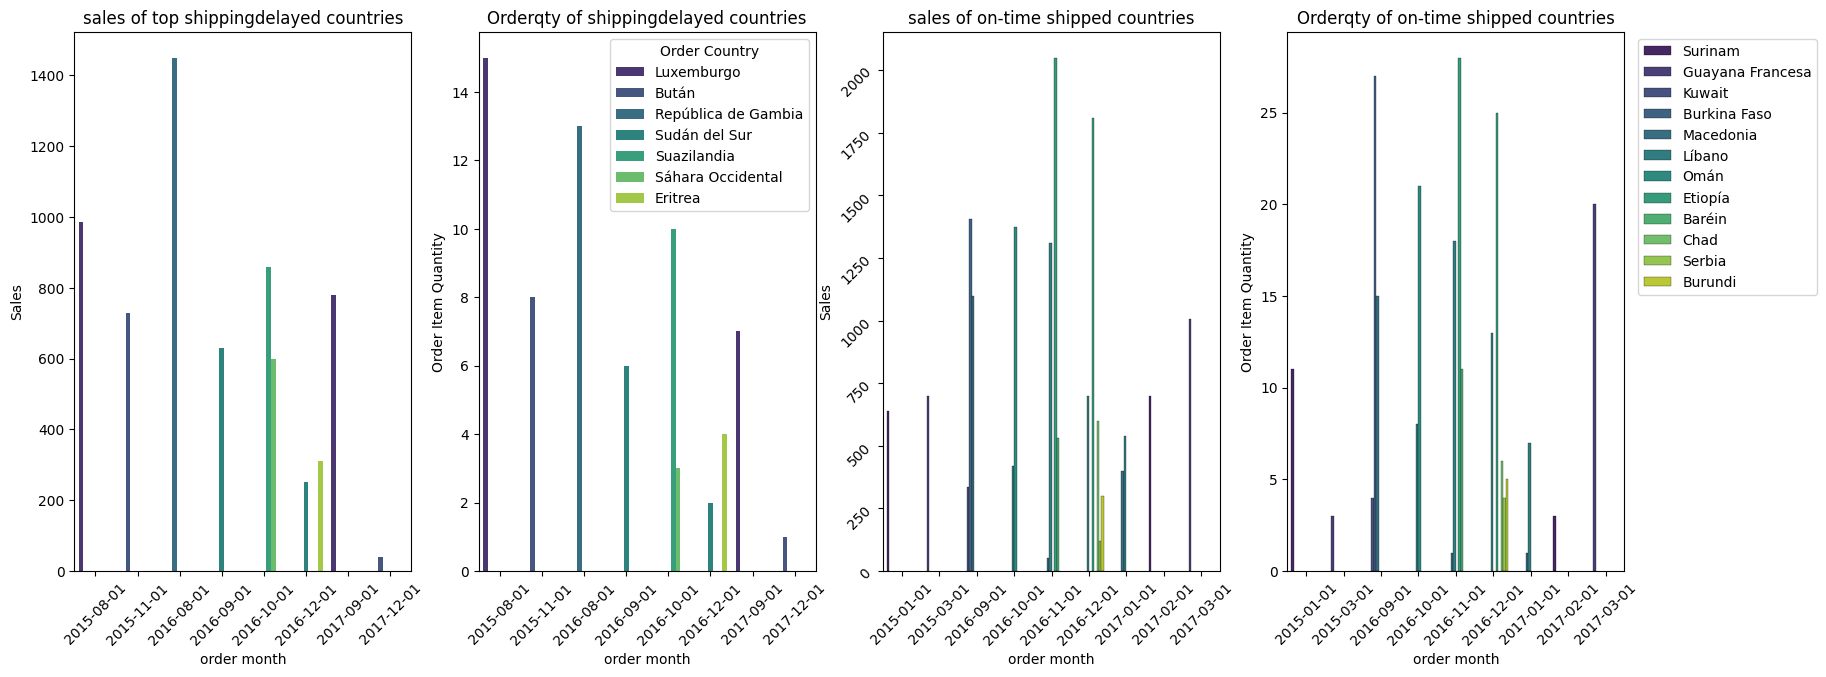

In [24]:
order_vol_countrywise=supplychaindatacleaned.groupby(['Order Country','order month']).agg({'Order Item Quantity':'sum','Sales':'sum'}).reset_index()
joined1=pd.merge(delayed_countries_DELAY,order_vol_countrywise,on='Order Country',how='inner')
joined1=joined1.sort_values(by='shippingdelay',ascending=False).head(10)
joined1=joined1.sort_values(by='order month')
fig,axes=plt.subplots(1,4,figsize=(20,7))
sns.barplot(y='Sales',x='order month',hue='Order Country',data=joined1,palette='viridis',ax=axes[0])
axes[0].set_title('sales of top shippingdelayed countries')
axes[0].tick_params(axis='x',labelrotation=45)
axes[0].legend().set_visible(False)
sns.barplot(y='Order Item Quantity',x='order month',hue='Order Country',data=joined1,palette='viridis',ax=axes[1])
axes[1].set_title('Orderqty of shippingdelayed countries')
axes[1].tick_params(axis='x',rotation=45)

joined2=pd.merge(ontime_del_countries,order_vol_countrywise,on='Order Country',how='inner')
joined2=joined2.sort_values(by='shippingdelay',ascending=False)
joined2=joined2.sort_values(by='order month')
sns.barplot(y='Sales',x='order month',hue='Order Country',data=joined2,palette='viridis',edgecolor='black',linewidth=0.2,ax=axes[2])
axes[2].tick_params(rotation=45)
axes[2].legend().set_visible(False)
axes[2].set_title('sales of on-time shipped countries')
sns.barplot(y='Order Item Quantity',x='order month',hue='Order Country',data=joined2,palette='viridis',edgecolor='black',linewidth=0.2,ax=axes[3])
axes[3].set_title('Orderqty of on-time shipped countries')
axes[3].legend(loc='upper left',bbox_to_anchor=(1.02,1))
axes[3].tick_params(axis='x',rotation=45)
plt.show()


# Impact of Shipping Timelines on Sales and Order Quantity Across Global Markets?

* Sales and Order Quantity are higher and more consistent in on-time shipped countries.
* Delayed countries show irregular and limited order activity.

On-time shipped countries show consistent sales and steady order volumes, while shipping-delayed countries experience sporadic, high but unstable spikes driven by logistical inefficiencies. This indicates that improving delivery reliability could transform irregular demand into sustained sales growth and stronger supply chain performance.

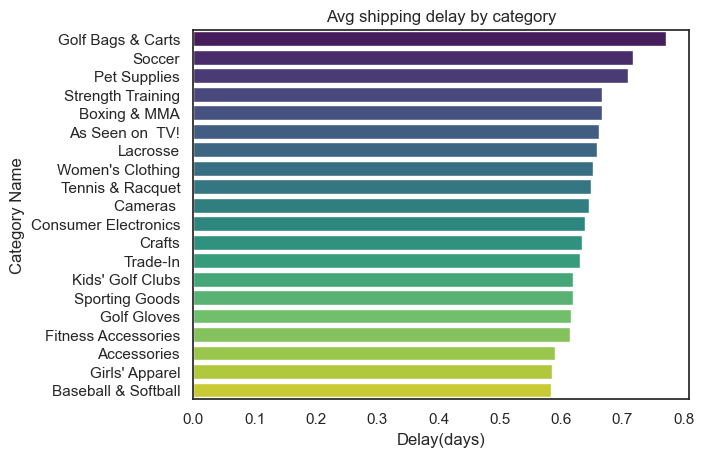

In [25]:
#product/delay impact - categories harder to ship identify
Pdt_dely_impact=supplychaindatacleaned.groupby('Category Name')['shippingdelay'].mean().sort_values(ascending=False)
pdts_impacton_delay=Pdt_dely_impact.head(20)

sns.set(style='white')
ax=sns.barplot(x=pdts_impacton_delay.values,y=pdts_impacton_delay.index,hue=pdts_impacton_delay.index,palette='viridis')
ax.set_title('Avg shipping delay by category')
ax.set_xlabel('Delay(days)')
plt.show()

# Products facing most shipping delays

The “Golf Bags & Carts” category shows the highest average delay (~0.78 days), followed closely by Soccer and Pet Supplies, indicating potential fulfillment or logistics bottlenecks in these categories. On the other hand, categories such as Girls’ Apparel, Accessories, and Baseball & Softball experience relatively lower delays (around 0.6 days), suggesting smoother and faster shipment processes.

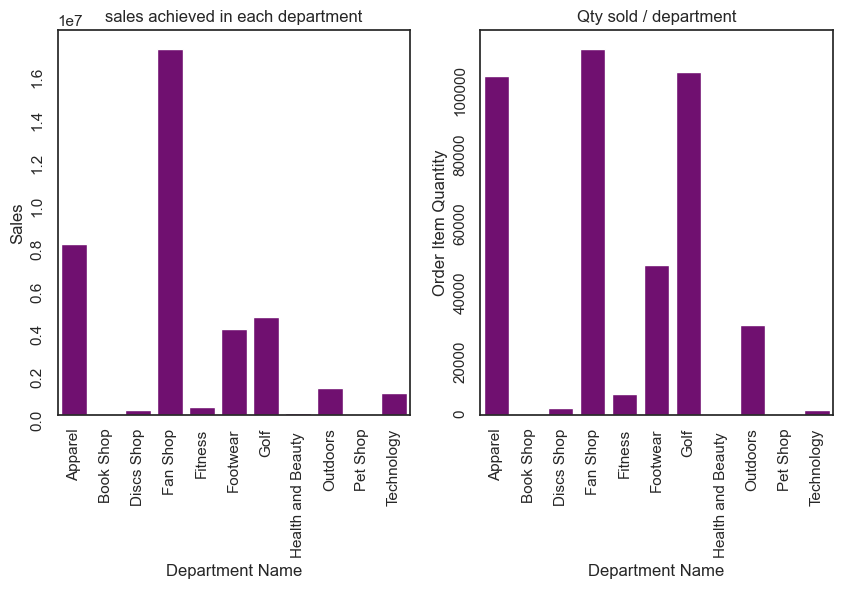

{'Fan Shop': array(['Hunting & Shooting', 'Camping & Hiking', 'Fishing', 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object), 'Apparel': array(['Cleats', "Men's Footwear", "Women's Clothing", 'Crafts',
       "Men's Clothing", "Children's Clothing", 'Baby '], dtype=object)}


In [26]:
deptwise_sales=supplychaindatacleaned.groupby('Department Name')['Sales'].sum().reset_index()
deptwise_qty=supplychaindatacleaned.groupby('Department Name')['Order Item Quantity'].sum().reset_index()

fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='Department Name',y='Sales',data=deptwise_sales,color='Purple',ax=axes[0])
axes[0].set_title('sales achieved in each department')
axes[0].tick_params(rotation=90)

sns.barplot(x='Department Name',y='Order Item Quantity',data=deptwise_qty,color='Purple',ax=axes[1])
axes[1].set_title('Qty sold / department')
axes[1].tick_params(rotation=90)
plt.show()

supplychaindatacleaned[['Department Name','Category Name']].drop_duplicates()
deptwisecategname=supplychaindatacleaned.groupby('Department Name')['Category Name'].unique().to_dict()
goods={i:deptwisecategname[i] for i in ['Fan Shop','Apparel']}
print(goods)

# Sales performance and product volume across departments

Sales and quantity are largely concentrated in sports- and apparel-related departments, suggesting these are the company’s key growth engines.Department wise, maximum sales come from Fan shop with its recreational goods, followed by Apparel which includes clothing varieties, footwear and more.The overlap between high sales and high volume in these categories points to both strong demand and healthy turnover.

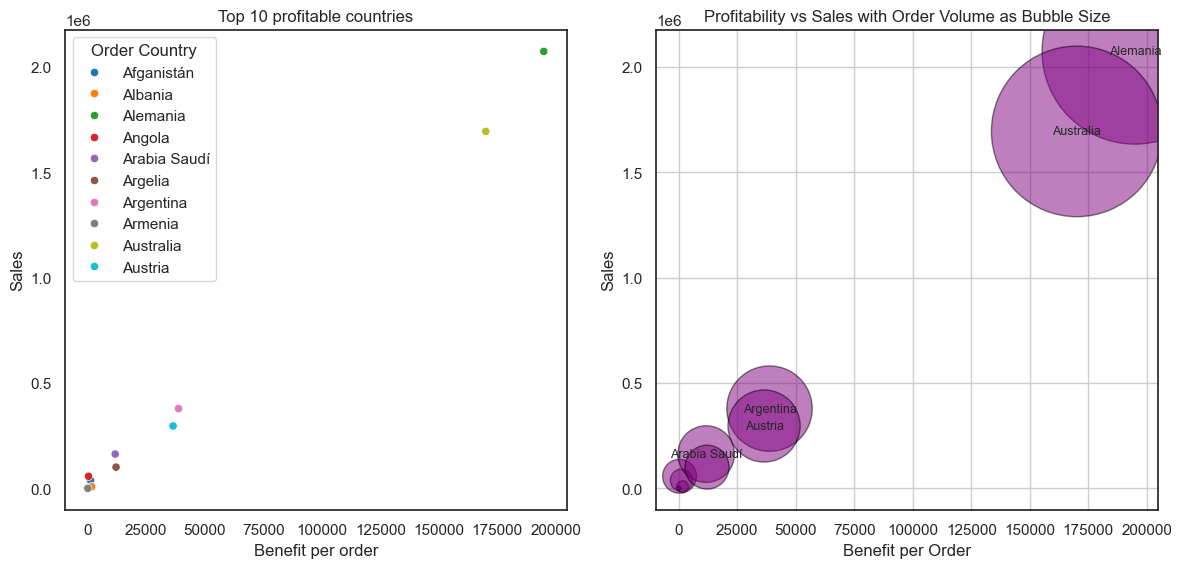

In [27]:
countrywise_profit=supplychaindatacleaned.groupby('Order Country').agg({'Benefit per order':'sum','Sales':'sum','Order Item Quantity': 'sum'}).reset_index()
countrywise_profit_top_10=countrywise_profit.head(10)
fig, axes= plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(x='Benefit per order',y='Sales',hue='Order Country',data=countrywise_profit_top_10,palette='tab10',ax=axes[0])
axes[0].set_title('Top 10 profitable countries')
size_factor=0.9
sizes=countrywise_profit_top_10['Order Item Quantity']	*size_factor

axes[1].scatter(countrywise_profit_top_10['Benefit per order'],
            countrywise_profit_top_10['Sales'],
            s=sizes, alpha=0.5, c='Purple',edgecolors='black')

top_countries = countrywise_profit_top_10.sort_values(by='Sales', ascending=False).head(5)
for _, row in top_countries.iterrows():
    axes[1].text(row['Benefit per order'], row['Sales'], row['Order Country'],
             fontsize=9, ha='center', va='center')
axes[1].set_title('Profitability vs Sales with Order Volume as Bubble Size')
axes[1].set_xlabel('Benefit per Order')
axes[1].set_ylabel('Sales')
axes[1].grid(True)
plt.tight_layout()
plt.show()

# Profit insights

* While the Scatter Plot (Top 10 Profitable Countries) focuses on Benefit per Order vs Sales, showing

-relative profitability and revenue across countries.

-Germany(Alemania) stands out as a clear outlier — high in both metrics

* The Bubble Chart (Profitability vs Sales with Order Volume) adds a third dimension: Order item  Quantity via bubble size, showing

-not just who’s profitable, but how much activity drives it.

-Germany still dominates, but Australia’s volume and  Saudí Arabia’s low impact is more clear


In [28]:
product_profitablity=supplychaindatacleaned.groupby(['Product Name','Category Name']).agg({'grossprofit' :'mean','Benefit per order' : 'median'}).reset_index()
import plotly.express as px

fig = px.scatter(product_profitablity, x='grossprofit', y='Benefit per order', color='Category Name',
                 hover_data=['Product Name'], title='Interactive Product Profitability')
fig.show()


# Product profitability

There’s a positive correlation between gross profit and benefit per order — higher profit items tend to yield greater per-order benefits,
a few strategic outliers deliver positive per-order value despite negative gross margins—indicating hidden profitability through bundling, operational efficiency, or customer acquisition impact

Outliers in the top-right (like computer and fitness categories) represent premium products driving profitability.

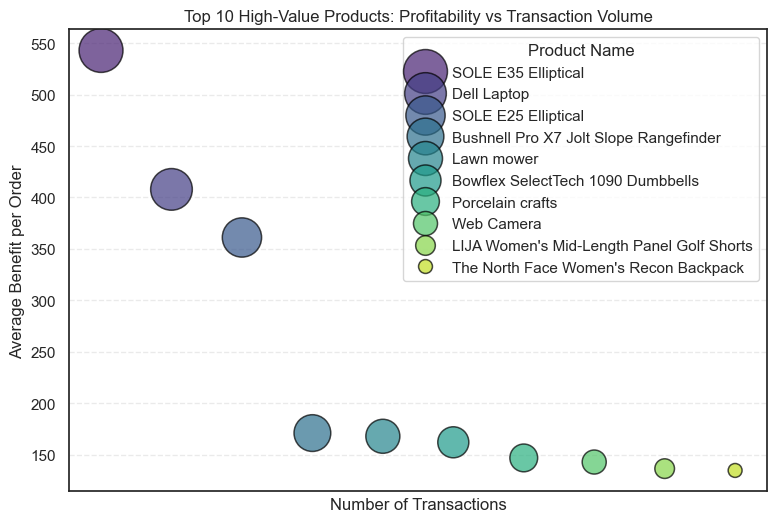

In [29]:
# high value segments
q1=supplychaindatacleaned['Benefit per order'].quantile(0.25)
q3=supplychaindatacleaned['Benefit per order'].quantile(0.75)

def value_segment(x):
    if x<q1:
        return 'Low value'
    elif x<q3 and x>0:
        return 'Mid value'
    else:
        return 'High value'
    

positiv_benefitsordr=supplychaindatacleaned[supplychaindatacleaned['Benefit per order']>0].copy()
positiv_benefitsordr['value_seg']=positiv_benefitsordr['Benefit per order'].apply(value_segment)
segment_summary=positiv_benefitsordr.groupby(['value_seg','Product Name'])['Benefit per order'].mean().reset_index()
highvalue_transactions=segment_summary[segment_summary['value_seg']=='High value'].sort_values(by='Benefit per order',ascending=False)

data=highvalue_transactions.head(10)
plt.figure(figsize=(9,6))
sns.scatterplot(data=data,x='Product Name',y='Benefit per order',size='Product Name',hue='Product Name',palette='viridis',sizes=(100, 1000),alpha=0.7,edgecolor='black')

# Labels and formatting
# for _, row in data.iterrows():
#     plt.text(row['Product Name'], row['Benefit per order'], row['Product Name'],
#              fontsize=8, ha='center', va='center')

plt.title('Top 10 High-Value Products: Profitability vs Transaction Volume')
plt.xlabel('Number of Transactions')
plt.ylabel('Average Benefit per Order')
plt.xticks([])
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


# Top high value products profitability vs transaction volume can be categorized into two main groups:

High-Margin, Low-Volume: These are premium products (e.g., ellipticals, laptops) that are major profit contributors with each sale. The business strategy here might focus on targeted marketing to qualified buyers.

Low-Margin, High-Volume: These are more accessible products (e.g., backpacks, apparel) that contribute through more frequent sales. The strategy for these could involve promotions or bundling to increase the average order value.

In [75]:
supplychaindatacleaned.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Region', 'Order State', 'Order Status', 'Product Card Id',
       'Product Category Id', 'Product Name', 'shipping date (DateOrders)',
       'Shipping Mode', 'shippingdelay', 'grossprofit', 'order month',
       'shipping month', 'Year'],
      dtype='object')

In [80]:
categorywise_delay=supplychaindatacleaned.groupby(['shippingdelay','Category Name'])['Benefit per order'].mean().sort_values()
categorywise_delay

shippingdelay  Category Name    
 3             Strength Training   -1072.032495
 2             Basketball           -189.218569
 4             As Seen on  TV!      -114.632498
 3             Men's Golf Clubs      -89.948747
-2             Strength Training     -35.637500
                                       ...     
               Computers             176.832098
-1             Computers             183.718834
 3             Basketball            228.367499
 1             Computers             232.245879
 4             Computers             417.892941
Name: Benefit per order, Length: 350, dtype: float64

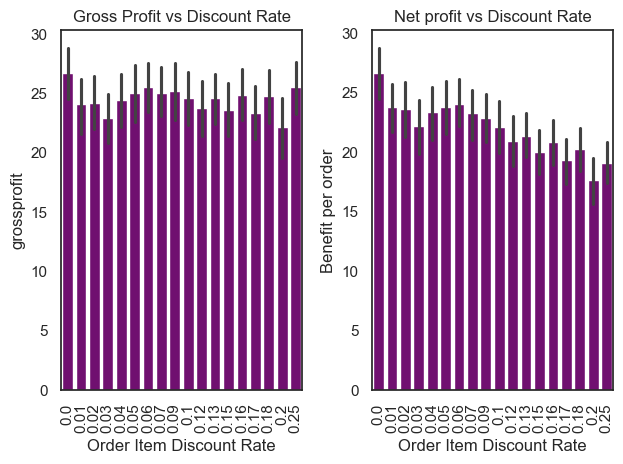

In [30]:
# actual profit obtained from sales and diff. with benefit per order(net profit) which is profit after discount.

supplychaindatacleaned['Order Item Discount Rate']=supplychaindatacleaned['Order Item Discount Rate'].round(2)
# supplychaindatacleaned['Benefit per order']=supplychaindatacleaned['Benefit per order'].sort_values()
# supplychaindatacleaned['grossprofit']=supplychaindatacleaned['grossprofit'].sort_values()
fig, axes=plt.subplots(1,2)
sns.barplot(data=supplychaindatacleaned,x='Order Item Discount Rate',y='grossprofit',ax=axes[0],color='Purple')
axes[0].set_title('Gross Profit vs Discount Rate')
axes[0].tick_params(axis='x',rotation=90)
sns.barplot(data=supplychaindatacleaned,x='Order Item Discount Rate',y='Benefit per order',ax=axes[1],color='Purple')
axes[1].set_title('Net profit vs Discount Rate')
axes[1].tick_params(axis='x', rotation=90)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Discount impact on profit

Both charts reinforce the idea that higher discounts reduce profitability. This insight is key for optimizing pricing strategy.

In [31]:
Cust_segment_analysis1=supplychaindatacleaned.groupby('Customer Segment').agg({
    'Sales':'mean','grossprofit':'mean','Benefit per order':'mean','Late_delivery_risk':'mean'}).reset_index()
Cust_segment_analysis1=Cust_segment_analysis1.set_index('Customer Segment')
Cust_segment_analysis1


Sales  grossprofit  Benefit per order  \
Customer Segment                                               
Consumer          204.224313    24.694601          22.175390   
Corporate         203.843962    24.443354          21.949204   
Home Office       202.337802    23.893792          21.437359   

                  Late_delivery_risk  
Customer Segment                      
Consumer                    0.548084  
Corporate                   0.547227  
Home Office                 0.550704

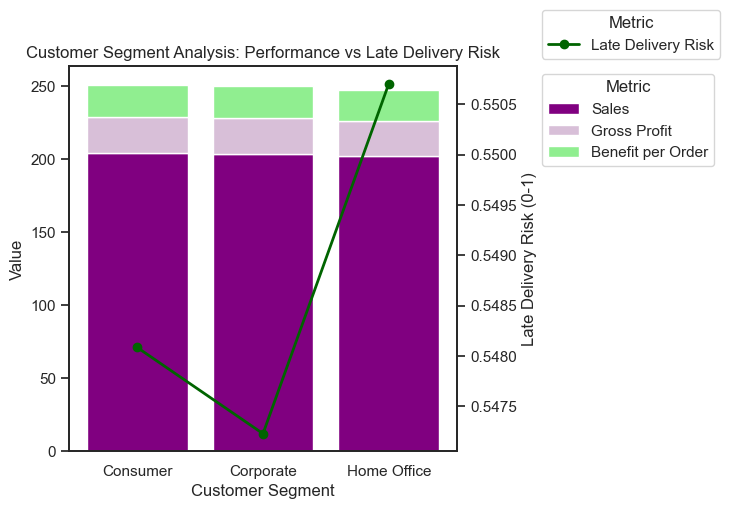

In [32]:
fig, ax1 = plt.subplots(figsize=(5,5))

ax1.bar(Cust_segment_analysis1.index, Cust_segment_analysis1['Sales'], 
        color='purple', label='Sales')
ax1.bar(Cust_segment_analysis1.index, Cust_segment_analysis1['grossprofit'], 
        color='thistle', bottom=Cust_segment_analysis1['Sales'], label='Gross Profit')
ax1.bar(Cust_segment_analysis1.index, Cust_segment_analysis1['Benefit per order'], 
        color='lightgreen', 
        bottom=Cust_segment_analysis1['Sales'] + Cust_segment_analysis1['grossprofit'], 
        label='Benefit per Order')

ax1.set_ylabel("Value")
ax1.set_xlabel("Customer Segment")
ax1.legend(loc='upper left',title='Metric',bbox_to_anchor=(1.2,1))

# Secondary axis for Late Delivery Risk
ax2 = ax1.twinx()
ax2.plot(Cust_segment_analysis1.index, Cust_segment_analysis1['Late_delivery_risk'], 
         color='darkgreen', marker='o', linewidth=2, label='Late Delivery Risk')
ax2.set_ylabel("Late Delivery Risk (0-1)")
ax2.legend(loc='lower right',title='Metric',bbox_to_anchor=(1.7,1))

plt.title("Customer Segment Analysis: Performance vs Late Delivery Risk")
plt.show()


# Customer segment analysis 1 - profit based

- indicates a fairly balanced customer base — no single segment overwhelmingly dominates total revenue.
- profitability margins and cost structures are consistent between customer types — no major outlier.
- no significant difference in late delivery risk across customer segments though home office segment may require attention.


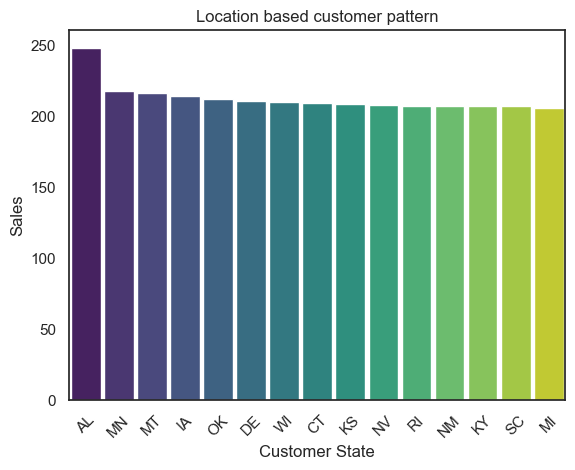

In [81]:
custseg_loc_analysis2=supplychaindatacleaned.groupby('Customer State')['Sales'].mean().reset_index()
Top_cust_states=custseg_loc_analysis2.sort_values('Sales',ascending=False)
sns.barplot(x='Customer State',y='Sales',hue='Customer State',width=0.9,data=Top_cust_states.head(15),palette='viridis')
plt.title('Location based customer pattern')
plt.xticks(rotation=45)
plt.show()

# Customer segmentation analysis 2 - location based(states)

- Alabama appears to be the customer state with maximum sales, followed by Minnesota and Montana.

In [34]:
print(len(supplychaindatacleaned['Customer Id'].unique()))

20652


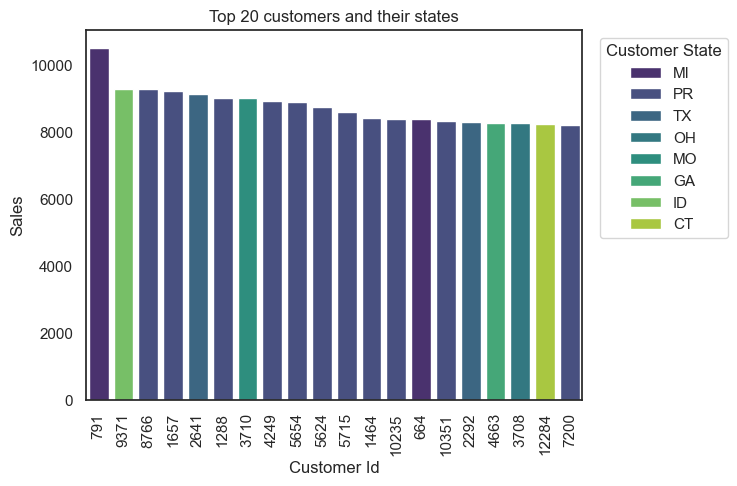

In [70]:
sales_bycustomer=supplychaindatacleaned.groupby(['Customer State','Customer Id'])['Sales'].sum().sort_values(ascending=False).reset_index()
top_customers=sales_bycustomer.head(20)
# customer_info=supplychaindatacleaned[['Customer Id','Customer Lname']].drop_duplicates()
# customer_info=dict(zip(supplychaindatacleaned['Customer Id'],supplychaindatacleaned['Customer Lname']))
# top_customers['Customer Lname']=top_customers.index.map(customer_info)
# top_customers
sns.barplot(x='Customer Id',y='Sales',data=top_customers,hue='Customer State',
            palette='viridis',order=top_customers['Customer Id'].to_list())

plt.title('Top 20 customers and their states')
plt.legend(title='Customer State',loc='upper left',bbox_to_anchor=(1.02,1))
plt.xticks(rotation=90)
plt.show()

# Customer analysis 3

Top 20 customers based on total sales have been identified along with their states. It can be observed that most of the sales are from Puerto Rico(PR) followed by Michigan(MI) and Texas(TX). Though customer Id 791 might be seen as an outlier;more profiling can be done to understand what drives that high sales factor.

In [73]:
cust_state_summary=supplychaindatacleaned.groupby('Customer State').agg(
    Total_sales=('Sales per customer','sum'),avg_sales_customer=('Sales per customer','mean'),customer_count=('Customer Id','nunique')).sort_values(by='Total_sales',ascending=False)
cust_state_summary

Total_sales  avg_sales_customer  customer_count
Customer State                                                  
PR              1.271125e+07          183.230541            7933
CA              5.327533e+06          182.287456            3321
NY              2.069265e+06          182.684332            1278
TX              1.679805e+06          184.533082            1088
IL              1.403156e+06          183.875780             855
FL              9.957474e+05          182.505024             583
OH              7.500988e+05          183.174302             465
MI              7.023447e+05          184.633193             427
PA              6.915687e+05          180.849547             426
NJ              5.882136e+05          184.335204             381
AZ              5.493855e+05          181.555028             372
GA              4.501908e+05          179.860485             312
MD              4.421557e+05          183.087228             264
NC              3.608121e+05          181.130579             230
CO              3.470918e+05          181.343664             214
VA              3.418147e+05          184.864653             235
OR              3.027909e+05          181.529288             193
MA              2.969174e+05          184.765011             198
TN              2.807835e+05          177.486405             161
NV              2.677357e+05          185.927550             179
MO              2.485672e+05          183.579899             143
HI              2.304992e+05          184.694906             144
CT              2.052618e+05          187.625066             128
NM              1.762298e+05          185.700508             116
UT              1.757880e+05          181.599207             116
LA              1.740778e+05          183.626331              91
WA              1.638783e+05          178.128600             105
WI              1.603296e+05          188.623049             106
MN              1.319584e+05          196.366714              74
SC              1.240214e+05          186.498378              61
DC              1.065920e+05          184.096720              67
IN              1.057923e+05          182.086491              60
KY              9.047300e+04          185.776183              55
KS              8.594623e+04          187.655526              48
DE              5.111896e+04          190.033311              44
RI              4.487497e+04          184.670660              29
OK              4.367101e+04          188.237114              36
WV              4.172038e+04          173.113612              26
ND              3.887940e+04          180.834420              24
ID              2.935273e+04          175.764852              15
AR              2.928636e+04          178.575368              20
MT              1.675082e+04          192.538162              11
IA              1.288079e+04          192.250599              12
AL              7.789100e+03          222.545716               6

In [36]:
# len(supplychaindatacleaned['Product Name'].unique()) : #118
# len(supplychaindatacleaned['Category Name'].unique()) : #50
print(supplychaindatacleaned['Department Name'].unique())
print(supplychaindatacleaned['Market'].unique())

['Fitness' 'Apparel' 'Golf' 'Footwear' 'Outdoors' 'Fan Shop' 'Technology'
 'Book Shop' 'Discs Shop' 'Pet Shop' 'Health and Beauty ']
['Pacific Asia' 'USCA' 'Africa' 'Europe' 'LATAM']


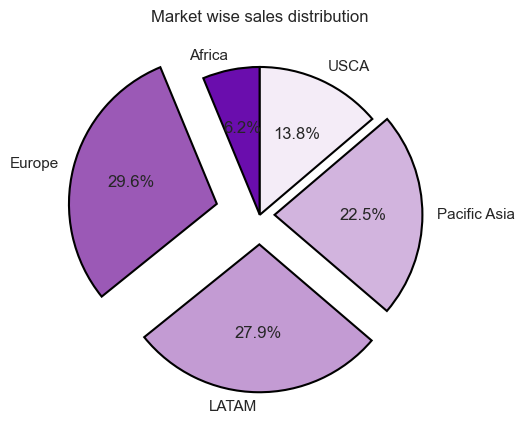

In [37]:
marketwise_sales=supplychaindatacleaned.groupby('Market')['Sales'].sum()
colors = ['#6a0dad', '#9b59b6', '#c39bd3', '#d2b4de', '#f4ecf7']
exp=[0,0.3,0.2,0.1,0]
plt.pie(marketwise_sales,autopct='%1.1f%%',labels=marketwise_sales.index,colors=colors,explode=exp,startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title('Market wise sales distribution')
plt.show()

# It appears the biggest market is the European region followed by Latin America

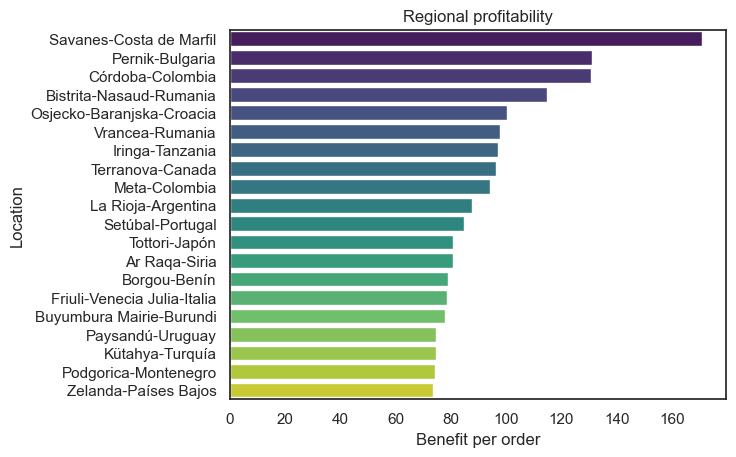

In [38]:
orderstate_profitability=supplychaindatacleaned.groupby(['Order State','Order Country'])['Benefit per order'].mean().sort_values(ascending=False).reset_index()
orderstate_profitability['Location']=(orderstate_profitability['Order State']+'-'+ orderstate_profitability['Order Country'])

sns.barplot(data=orderstate_profitability.head(20),y='Location',x='Benefit per order',hue='Location',palette='viridis')
plt.ylabel('Location')
plt.title('Regional profitability')
plt.show()

# Regional profitability

An assessment of average benefit per order across global regions reveals significant variation in profitability. 

The analysis identifies Savanes (Costa de Marfil), Pernik (Bulgaria), and Córdoba (Colombia) as top-performing markets, each exhibiting substantially higher profit margins per transaction. 

This may indicate favorable market dynamics such as premium pricing, efficient logistics, or stronger customer purchasing capacity.

In [39]:
#global sales view - sales heatmap to see order density using lat and long.
import plotly.express as px
fig = px.density_map(
    supplychaindatacleaned,
    lat='Latitude',
    lon='Longitude',
    z='Sales',
    radius=9,
    center=dict(lat=37, lon=-95),
    zoom=2,
    map_style="satellite",
    hover_data={'Sales': True},
    color_continuous_scale='PuRd',
    title="Global Customer Density Heatmap"
)
fig.show()


In [40]:
print(supplychaindatacleaned['Order Status'].value_counts())

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64


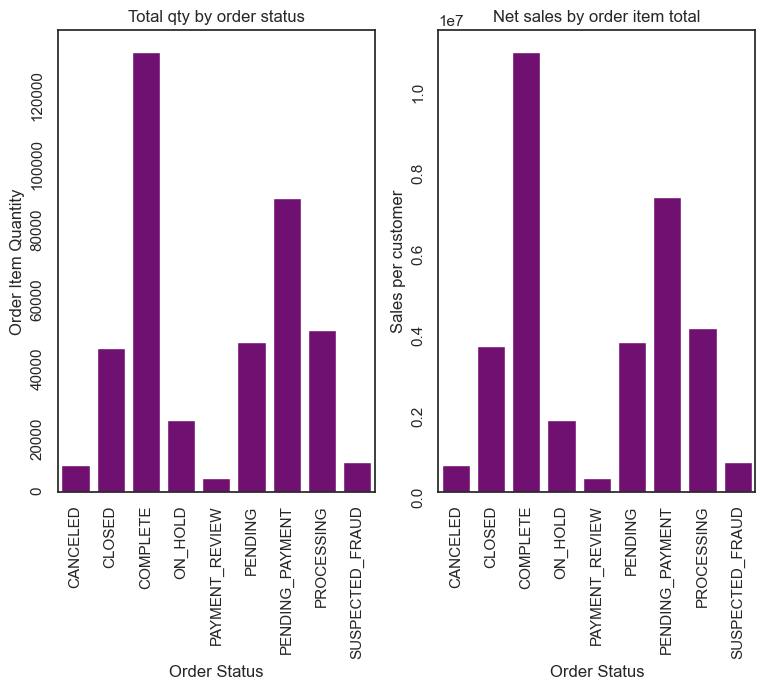

In [41]:
orderstats=supplychaindatacleaned.groupby('Order Status').agg({'Order Item Quantity':'sum','Sales per customer':'sum',
                                                               'Order Id':'nunique'}).reset_index()

fig, axes = plt.subplots(1,2,figsize=(9,6))
sns.barplot(x='Order Status',y='Order Item Quantity',data=orderstats,color='Purple',ax=axes[0])
axes[0].set_title('Total qty by order status')
axes[0].tick_params(rotation=90)
sns.barplot(x='Order Status',y='Sales per customer',data=orderstats,color='Purple',ax=axes[1])
axes[1].set_title('Net sales by order item total')
axes[1].tick_params(rotation=90)
plt.show()

In [42]:
orderstats

Order Status  Order Item Quantity  Sales per customer  Order Id
0         CANCELED                 7875        6.682450e+05      1367
1           CLOSED                41458        3.617467e+06      7249
2         COMPLETE               126624        1.085927e+07     21716
3          ON_HOLD                20845        1.780238e+06      3624
4   PAYMENT_REVIEW                 4109        3.455762e+05       704
5          PENDING                43196        3.704456e+06      7321
6  PENDING_PAYMENT                84736        7.286276e+06     14382
7       PROCESSING                46623        4.051381e+06      7901
8  SUSPECTED_FRAUD                 8613        7.414923e+05      1488

# Order fulfillment/operational efficiency

* COMPLETED order status dominates, confirming that fulfilled orders drive the bulk of revenue while PROCESSING, ON_HOLD, and PENDING_PAYMENT have low quantities — potential bottlenecks or delays, showing low sales also maybe due to unresolved issues?
* Though system is efficient at completing orders, some operational friction is seen in intermediate statuses like PROCESSING and PAYMENT_REVIEW delaying fulfillment and revenue realization.
* Monitoring and optimizing these bottleneck statuses could improve throughput and customer satisfaction.

In [43]:

#Conversion ratio → (Complete orders / Total orders)
#Cancellation loss → (Canceled sales value / Total potential sales)
#Revenue-at-risk → Pending or Processing value as % of total

conv_ratio=orderstats.loc[orderstats['Order Status']=='COMPLETE','Order Id'].values[0]/orderstats['Order Id'].sum()
complete_sales=orderstats.loc[orderstats['Order Status']=='COMPLETE','Sales per customer'].values[0]
total_sales=orderstats['Sales per customer'].sum()
proportion_sales = complete_sales / total_sales
print(f'Proportion of COMPLETE sales: {proportion_sales*100:.1f}%')
conv_ratio1=orderstats.loc[orderstats['Order Status']=='COMPLETE','Sales per customer'].values[0]/orderstats['Sales per customer'].sum()
print(f'Conversion rate of orders is around', conv_ratio.round(2))
print(f'Sales rate Conversion of orders is around', conv_ratio1.round(2))
cancel_loss=orderstats.loc[orderstats['Order Status']=='CANCELED','Sales per customer'].values[0]/orderstats['Sales per customer'].sum()
print(f'Cancellation loss in sales is',cancel_loss.round(2))
Revenue_risk=orderstats.loc[orderstats['Order Status'].isin(['PENDING','PENDING_PAYMENT','PROCESSING']),'Sales per customer'].sum()/orderstats['Sales per customer'].sum()
print(f'Revenue at risk due to pending actions is',Revenue_risk.round(2))

Proportion of COMPLETE sales: 32.9%
Conversion rate of orders is around 0.33
Sales rate Conversion of orders is around 0.33
Cancellation loss in sales is 0.02
Revenue at risk due to pending actions is 0.46


# Quantifying efficiency and missed opportunity segments 

- “COMPLETE” accounts for ~33%  sales.
- The majority of volume and revenue is spread across other statuses.
- This means a significant portion of business is still in flux — pending or processing; order bottlenecks need to be reviewed urgently.


## **Supply Chain Data Project: Executive Summary & Insights**

### **Project Scope**
- Analysis of global supply chain data to identify shipping delays, product profitability, regional performance, and customer segments.
- Data cleaning, transformation, and visualization conducted in Python using Pandas, Matplotlib, Seaborn, and Plotly.

***

### **1. Data Preparation**

- Data was thoroughly cleaned:
  - Columns with too many missing values or duplicates were dropped.
  - Null values replaced with sensible defaults ("unknown" or mode values).
  - Relevant new columns were engineered for shipping delay, gross profit, and shipment/order months.

***

### **2. Shipping & Delivery**

- **On-Time vs Delayed Shipments:**
  - Most countries have reliable shipping, but **15 countries** regularly see average delays over 1 day.
  - *Luxembourg* and *South Sudan* have the highest shipping delays.

- **Shipping Mode Performance:**
  - **Standard Class**: Most consistent; delivers on-time as promised.
  - **Second Class**: Slowest—customers experience the longest wait.
  - **First Class**: Slight delays, more often late.
  - **Same Day**: Generally reliable.

- **Impact of Shipping Delays:**
  - Delayed countries show irregular order volumes and less consistent sales.
  - On-time shipping improves customer satisfaction and drives more steady sales.

***

### **3. Product Profitability**

- **Profit vs Discount:**
  - Bigger discounts lead to reduced profitability—showing the trade-off between attracting customers and profit margins.
  - High-margin products (e.g., laptops, ellipticals) yield stronger profits but typically sell less often ("low volume, high value").
  - Lower-margin products (e.g., backpacks, apparel) rely on frequent sales.

- **Department Analysis:**
  - Sports gear, fan shop items, and apparel are top sellers and drive overall growth.
  - Some product categories experience higher shipping delays but also show strong sales—suggesting high demand despite logistics challenges.

***

### **4. Regional & Market Insights**

- **Geographic Sales Patterns:**
  - Europe is the top market, followed by Latin America and Pacific Asia.
  - U.S.-based customers drive much of the activity (as seen in customer maps and state analyses).

- **Regional Profitability:**
  - Countries/regions like Germany, Australia, Argentina, and Saudi Arabia outperform others in profitability and sales volume.

***

### **5. Customer Segmentation**

- **Customer Type:**
  - Sales and profitability are balanced across consumer, corporate, and home office segments; no single segment dominates.
  - Delivery risk is similar for each segment, though "Home Office" shows slightly more delays.

- **Customer & State Insights:**
  - Top 20 customers identified by state; *Puerto Rico* and *Michigan* lead in sales volume.
  - *Alabama* is the customer state with the highest sales, followed closely by Minnesota and Montana.

***

### **6. Operations & Efficiency**

- **Order Status Trends:**
  - "Complete" orders represent about 33% of all revenue—unfinished or pending orders reflect missed opportunities and bottlenecks.
  - Substantial revenue is in flux or at risk due to delayed or pending orders.

- **Efficiency Metrics:**
  - Conversion and sales rate for completed orders are around 33%.
  - Cancellation losses are low (~2%).
  - Pending or processing actions account for ~46% of revenue at risk, pointing to operational improvement opportunities.

***

## **Key Takeaways & Recommendations**

- **Invest in Improving Shipping Reliability:**  
  Target bottleneck countries for shipment process optimization.
- **Balance Discounts With Profit:**  
  Higher discounting may attract volume but erodes margins—find the sweet spot using data.
- **Focus on Growth Markets:**  
  Prioritize efforts in high-profit countries and strong-performing regions (Europe, Latin America).
- **Monitor Pending Orders:**  
  Reduce bottlenecks and accelerate processing actions to unlock more revenue.
- **Leverage Customer Insights:**  
  Use segmentation (by region, type) for tailored marketing and improved supply chain strategies.
